<a href="https://colab.research.google.com/github/AndrewSlutsky/DA/blob/main/Lab3DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Зниження розмірності та візуалізація**


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pulsar_data = pd.read_csv('pulsar_data_train.csv')
pulsar_data[' Excess kurtosis of the integrated profile'].fillna(pulsar_data[' Excess kurtosis of the integrated profile'].mean(), inplace=True)
pulsar_data[' Standard deviation of the DM-SNR curve'].fillna(pulsar_data[' Standard deviation of the DM-SNR curve'].mean(), inplace=True)
pulsar_data[' Skewness of the DM-SNR curve'].fillna(pulsar_data[' Skewness of the DM-SNR curve'].mean(), inplace=True)


In [ ]:
X = pulsar_data.drop(['target_class'], axis=1)
y = pulsar_data['target_class']

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pca_result = pca.transform(X)


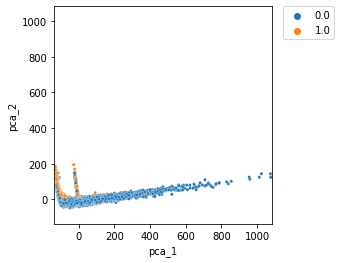

In [ ]:
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


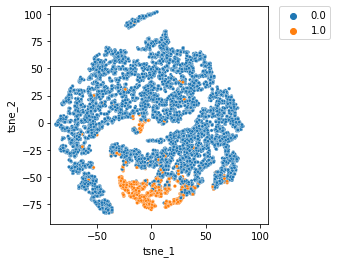

In [ ]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# **Кластерний аналіз 1**

In [65]:
from sklearn.cluster import KMeans
from skimage import io

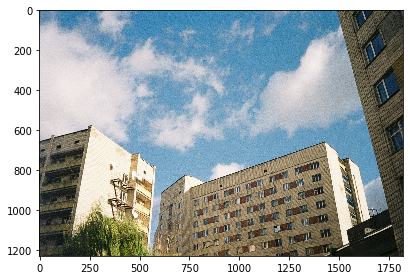

In [ ]:
image_init = io.imread('kpi.jpg')
io.imshow(image_init)
io.show()
rows, cols = image_init.shape[:2]
image_init = image_init.astype(np.int64)
image = image_init.reshape(rows*cols, 3)

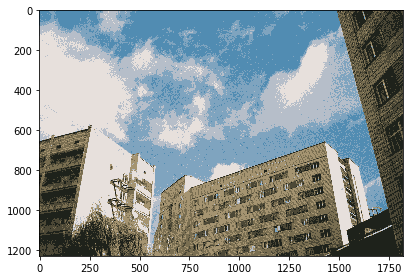

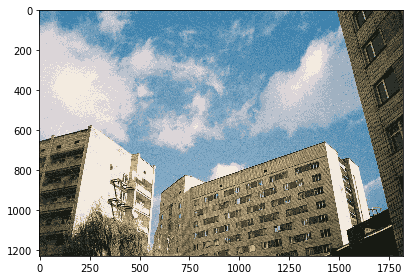

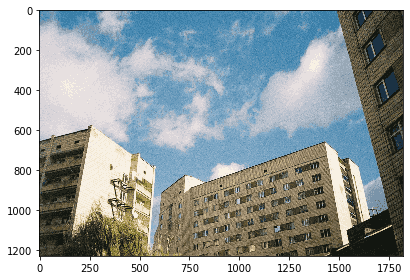

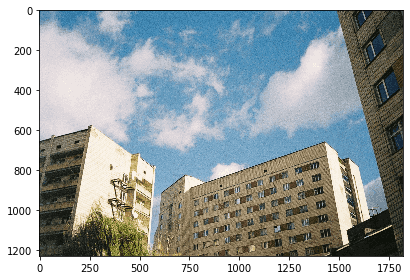

In [ ]:
for k in [8, 16, 32, 64]:
    kmeans_skl = KMeans(n_clusters=k)
    kmeans_skl.fit(image)

    compressed_image = kmeans_skl.cluster_centers_[kmeans_skl.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

    compressed_image = compressed_image.reshape(rows, cols, 3)
    io.imshow(compressed_image)
    io.show()

# **Кластерний аналіз 2**

In [70]:
from sklearn.mixture import GaussianMixture

In [71]:
mean = [3, 4]
cov = [[3, 0], [0, 3]]
x1 = np.random.multivariate_normal(mean, cov, 100)

mean = [4, 3]
cov = [[1, 0], [0, 1]]
x2 = np.random.multivariate_normal(mean, cov, 100)

x = np.concatenate([x1, x2])

In [72]:
gm = GaussianMixture(n_components = 2, covariance_type = 'diag').fit(x)

In [73]:
print(gm.means_)
print(gm.covariances_)

[[3.8635356  3.03079568]
 [3.1303223  4.45588264]]
[[1.11456665 1.58602277]
 [3.87482221 3.02915531]]


# **Обробка текстових даних**

In [75]:
import re

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [83]:
train = pd.read_csv('Musical_instruments_reviews.csv',encoding = 'latin1')


df = train.append(train, ignore_index = True)

df = df.drop('reviewerID', axis = 1)
df = df.drop('asin', axis = 1)
df = df.drop('reviewerName', axis = 1)
df = df.drop('helpful', axis = 1)
df = df.drop('summary', axis = 1)
df = df.drop('unixReviewTime', axis = 1)
df = df.drop('reviewTime', axis = 1)
df.head(6)

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0
5,So good that I bought another one. Love the h...,5.0


In [84]:
from collections import Counter
Counter( df['overall'])

Counter({1.0: 434, 2.0: 500, 3.0: 1544, 4.0: 4168, 5.0: 13876})

In [98]:
import re
import string
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words("english")

def clean_text(text):
    text = re.sub('\s{2,}',' ', text)
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text
df['reviewText'] = df['reviewText'].apply(str)
df['reviewText'] = df['reviewText'].apply(lambda x : clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


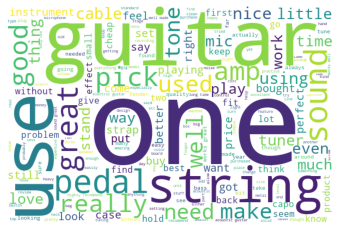

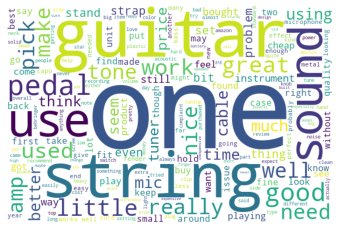

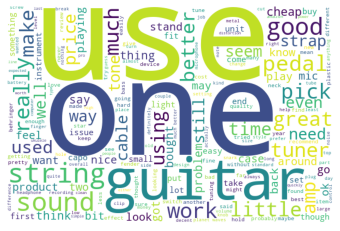

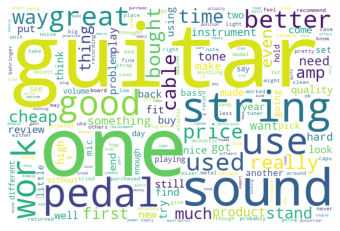

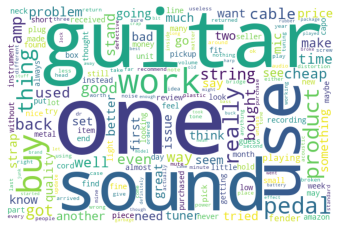

In [101]:
def visualize(label):
    text = ''
    for msg in df[df['overall'] == label]['reviewText']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize(5)
visualize(4)
visualize(3)
visualize(2)
visualize(1)

In [102]:
X = df['reviewText']
y = df['overall']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf = vectorizer.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [103]:
rfc = RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_features = 'sqrt').fit(X_train, y_train)

predict = rfc.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         1.0       1.00      0.81      0.90        86
         2.0       1.00      0.84      0.91        97
         3.0       0.99      0.79      0.88       299
         4.0       1.00      0.76      0.86       846
         5.0       0.90      1.00      0.95      2777

    accuracy                           0.93      4105
   macro avg       0.98      0.84      0.90      4105
weighted avg       0.93      0.93      0.92      4105



In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation

In [105]:
LDA = LatentDirichletAllocation(n_components = 5,
                                max_iter = 30,
                                n_jobs = 6,
                                learning_method = 'batch',
                                verbose = False)

count_vect = CountVectorizer(stop_words = 'english')

In [108]:
a1 = df[df['overall'] == 1].reviewText
a2 = df[df['overall'] == 2].reviewText
a3 = df[df['overall'] == 3].reviewText
a4 = df[df['overall'] == 4].reviewText
a5 = df[df['overall'] == 5].reviewText
classes = [a1, a2, a3, a4, a5]

tw = []

for i in classes:
    LDA.fit(count_vect.fit_transform(i))
    top_words = LDA.components_[0].argsort()[-20:]
    for j in top_words:
        tw.append(count_vect.get_feature_names()[j])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [109]:
a1 = set(tw[:20])
a2 = set(tw[20:40])
a3 = set(tw[40:60])
a4 = set(tw[60:80])
a5 = set(tw[80:100])

In [110]:
print(((((a1.difference(a2)).difference(a3)).difference(a4)).difference(a5)))
print(((((a2.difference(a1)).difference(a3)).difference(a4)).difference(a5)))
print(((((a3.difference(a1)).difference(a2)).difference(a4)).difference(a5)))
print(((((a4.difference(a1)).difference(a3)).difference(a2)).difference(a5)))
print(((((a5.difference(a1)).difference(a3)).difference(a4)).difference(a2)))

{'problem', 'screw', 'thanks', 'bass', 'low', 'unit', 'electric', 'thought', 'stand', 'bridge', 'battery', 'know'}
{'worth', 'money', 'product', 'high'}
{'using', 'amp', 'quality', 'work'}
{'little', 'pick', 'tune', 'works', 'tuner', 'picks'}
{'acoustic', 'guitars', 'set', 'new'}
